## Description:
#### This is a sentiment analysis program that works on tweets fetched from twitter using Python

In [1]:
## Import libraries
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
## Get the data
log = pd.read_csv('Login.csv')

In [3]:
## Get twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken = log['key'][2]
accessTokenSecret = log['key'][3]

In [4]:
## Create authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

## Set access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

## Create API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [64]:
## Extract 100 tweets from the twitter user
screenName = "BarackObama"
posts = api.user_timeline(screen_name = screenName, count = 100, lang = "en", tweet_mode="extended")

## Print last tweets from the account
print("Show the 5 latest tweets from " + screenName.upper() + "\n" )
i=1
for tweet in posts[0:5]:
    print (str(i) + ') ' + tweet.full_text + '\n') 
    i = i + 1

Show the 5 latest tweets from BARACKOBAMA

1) This young generation makes me optimistic about our future. By protesting, they’re speaking up and shining a light on injustice––and one way we can support them is to vote for people who’ll change the laws on every level.
https://t.co/3Ng1IC73nY

2) In Columbia, Maryland, young people wielded social media to connect across boundaries, amplify voices, and enact some real change.  
https://t.co/RWcfVwdv4j

3) This group of Nashville teens led a peaceful march with tens of thousands of people in their community. 
https://t.co/KWVsI0Z53E

4) Over the past few weeks, we’ve seen young people in every corner of the country step up and become leaders. Through organization and mobilization, they’re showing us how we can sustain this momentum to bring about real change. https://t.co/UKnowQM2Lj

5) It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. htt

In [65]:
## Create a dataframe with a colum called tweets
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])

## Show first 5 rows of data
df.head(5)

,Tweets
0,This young generation makes me optimistic abou...
1,"In Columbia, Maryland, young people wielded so..."
2,This group of Nashville teens led a peaceful m...
3,"Over the past few weeks, we’ve seen young peop..."
4,"It’s too early to tell if it’s permanent, but ..."


In [66]:
## Clean the text

## Create a function to clean the tweets 
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #removes @mentions
    text = re.sub(r'#', '', text) #removes the '#' symbol
    text = re.sub(r'RT[\s]+', '', text) #removes 'RT'
    text = re.sub(r'https:\/\/[a-zA-Z0-9]+', '', text) #removes hyperlinks
    
    return text

## CLeaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

## Show the cleaned text
df

,Tweets
0,This young generation makes me optimistic abou...
1,"In Columbia, Maryland, young people wielded so..."
2,This group of Nashville teens led a peaceful m...
3,"Over the past few weeks, we’ve seen young peop..."
4,"It’s too early to tell if it’s permanent, but ..."
...,...
95,"In my old neighborhood, the established a cri..."
96,. Fellow is helping seniors fight loneliness ...
97,Some great stories of big-hearted people comin...
98,"In the meantime, remember to check up by phone..."


In [67]:
## Create a funtion to get subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

## Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

## Create two columns (Subjectivity and Polarity)
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

##SHow the new DF with new columns
df

,Tweets,Subjectivity,Polarity
0,This young generation makes me optimistic abou...,0.408333,0.166667
1,"In Columbia, Maryland, young people wielded so...",0.255556,0.111111
2,This group of Nashville teens led a peaceful m...,0.500000,0.250000
3,"Over the past few weeks, we’ve seen young peop...",0.262500,-0.037500
4,"It’s too early to tell if it’s permanent, but ...",0.333333,0.266667
...,...,...,...
95,"In my old neighborhood, the established a cri...",0.333333,-0.133333
96,. Fellow is helping seniors fight loneliness ...,0.218182,0.078788
97,Some great stories of big-hearted people comin...,0.676136,-0.017298
98,"In the meantime, remember to check up by phone...",0.500000,-0.500000


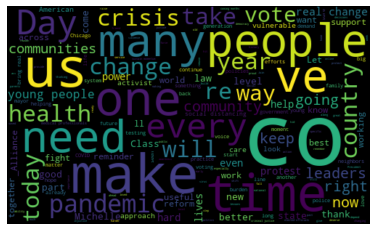

In [68]:
## Plot word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [69]:
## Create a function to compute the positive, neutral and negative analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
df['Analysis'] = df['Polarity'].apply(getAnalysis)

##Show DF
df

,Tweets,Subjectivity,Polarity,Analysis
0,This young generation makes me optimistic abou...,0.408333,0.166667,Positive
1,"In Columbia, Maryland, young people wielded so...",0.255556,0.111111,Positive
2,This group of Nashville teens led a peaceful m...,0.500000,0.250000,Positive
3,"Over the past few weeks, we’ve seen young peop...",0.262500,-0.037500,Negative
4,"It’s too early to tell if it’s permanent, but ...",0.333333,0.266667,Positive
...,...,...,...,...
95,"In my old neighborhood, the established a cri...",0.333333,-0.133333,Negative
96,. Fellow is helping seniors fight loneliness ...,0.218182,0.078788,Positive
97,Some great stories of big-hearted people comin...,0.676136,-0.017298,Negative
98,"In the meantime, remember to check up by phone...",0.500000,-0.500000,Negative


In [70]:
## Print all positive tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'])

for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == "Positive"):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) This young generation makes me optimistic about our future. By protesting, they’re speaking up and shining a light on injustice––and one way we can support them is to vote for people who’ll change the laws on every level.
.co/3Ng1IC73nY

2) In Columbia, Maryland, young people wielded social media to connect across boundaries, amplify voices, and enact some real change.  
.co/RWcfVwdv4j

3) This group of Nashville teens led a peaceful march with tens of thousands of people in their community. 
.co/KWVsI0Z53E

4) It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. .co/9qlOdWKAuO

5) As has always been true at key moments in history, it’s going to depend on young people to go out there and rewrite what is possible.

I couldn’t be prouder of all the young people leading that change right now. Here’s my advice for the Class of 2020: .co/XD2n7LEihk

6) Third, every city in this country shou

In [71]:
## Print all negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'], ascending = False)
for i in range(0, sortedDF.shape[0]):
    if (sortedDF['Analysis'][i] == "Negative"):
        print(str(j)+') '+sortedDF['Tweets'][i])
        print()
        j = j+1

1) Over the past few weeks, we’ve seen young people in every corner of the country step up and become leaders. Through organization and mobilization, they’re showing us how we can sustain this momentum to bring about real change. .co/UKnowQM2Lj

2) : Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that burden is now a…

3) : Georgians are risking their health to cast a vote, only to be met with absurdly long lines, broken voting machines, and…

4) We’ve seen the power that our voices have when we speak out about injustice––but we also know the toll that it takes on our mental health. Today, I talked to , Bryan Stevenson, and _Alliance activists about ways to keep our mental health a priority at this time. .co/PAsWb607EU

5) On National Gun Violence Awareness Day, we WearOrange to honor the victims and survivors of gun violence––which continues to disproportionately harm Black communities. Then keep speaking up, voting, and changin

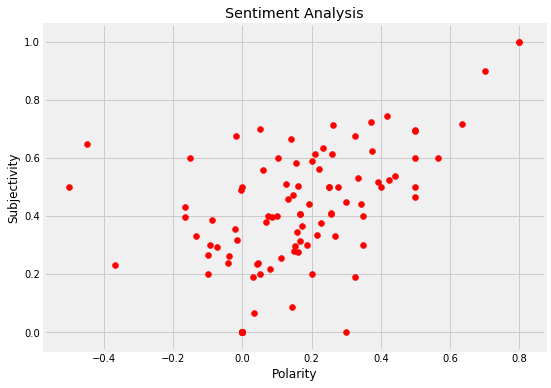

In [72]:
## Plot polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
    plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Red')
    
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [73]:
## Get percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

round((ptweets.shape[0]/df.shape[0])*100, 1)

71.0

In [74]:
## Get percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

round((ntweets.shape[0]/df.shape[0])*100, 1)

18.0

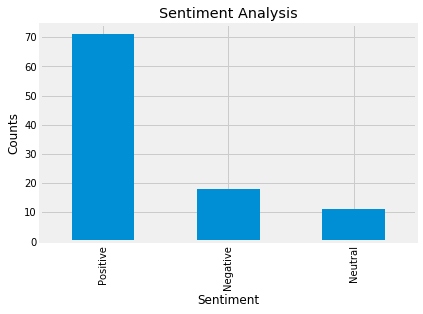

In [75]:
## Show value counts 
df['Analysis'].value_counts()

## plot and visualiza the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()